<a href="https://colab.research.google.com/github/Jaewon45/ESAA_2022/blob/main/1128_Keras_ImgClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://www.tensorflow.org/tutorials/keras/classification?hl=ko#%EB%AA%A8%EB%8D%B8_%EA%B5%AC%EC%84%B1

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


### 패션 MNIST 데이터셋 임포트

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

### 데이터 전처리

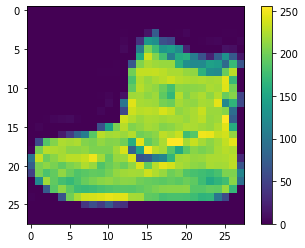

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

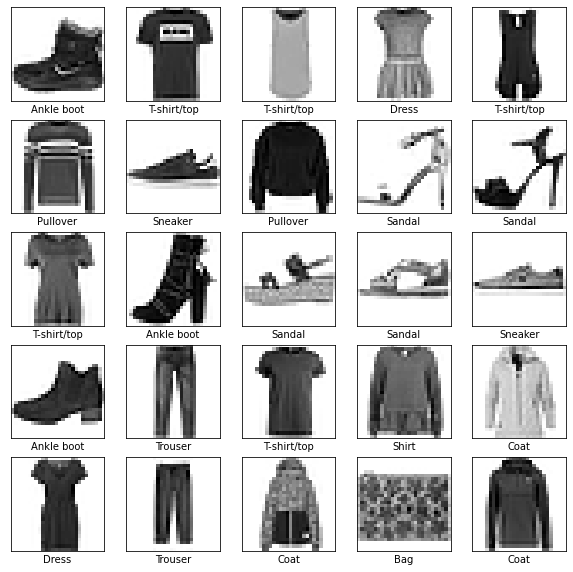

In [11]:
# 처음 25개 이미지와 클래스 이름 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 모델 구성

- 층 설정

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 2차원 배열(28 x 28 픽셀)을 28 * 28 = 784 픽셀의 1차원 배열로 변환
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10) # 10개의 확률을 반환하고 반환된 값의 전체 합은 1
])

- 모델 컴파일

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 모델 훈련
1. 훈련 데이터를 모델에 주입
2. 모델 훈련
3. 테스트 세트에 대한 모델의 예측 생성
4. 이 예측이 test_labels 배열의 레이블과 맞는지 확인

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5026 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3745 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3115 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2942 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2789 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2649 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2569 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2464 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

- 정확도 평가

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3520 - accuracy: 0.8755 - 402ms/epoch - 1ms/step

Test accuracy: 0.8755000233650208


- 예측하기

In [16]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [18]:
predictions[0]

array([5.20530448e-05, 3.89401261e-10, 5.83045301e-09, 1.22212393e-10,
       1.15197786e-07, 1.10450701e-03, 4.69390109e-08, 6.91330573e-03,
       2.07492423e-08, 9.91929948e-01], dtype=float32)

In [19]:
# 가장 높은 신뢰도를 가진 레이블
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

- 10개 클래스에 대한 예측을 그래프로 확인

In [21]:
# 이미지 시각화
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue' # 정답
  else:
    color = 'red' # 오답
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], # 예측 레이블
                                100*np.max(predictions_array), # 해당 레이블의 예측된 확률
                                class_names[true_label]), # 실제 레이블
                                color=color)

# 레이블 별 예측확률 시각화
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

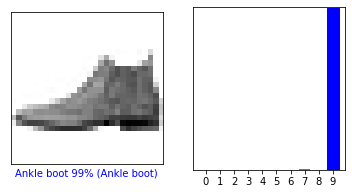

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

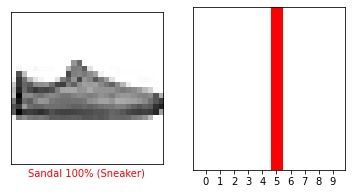

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

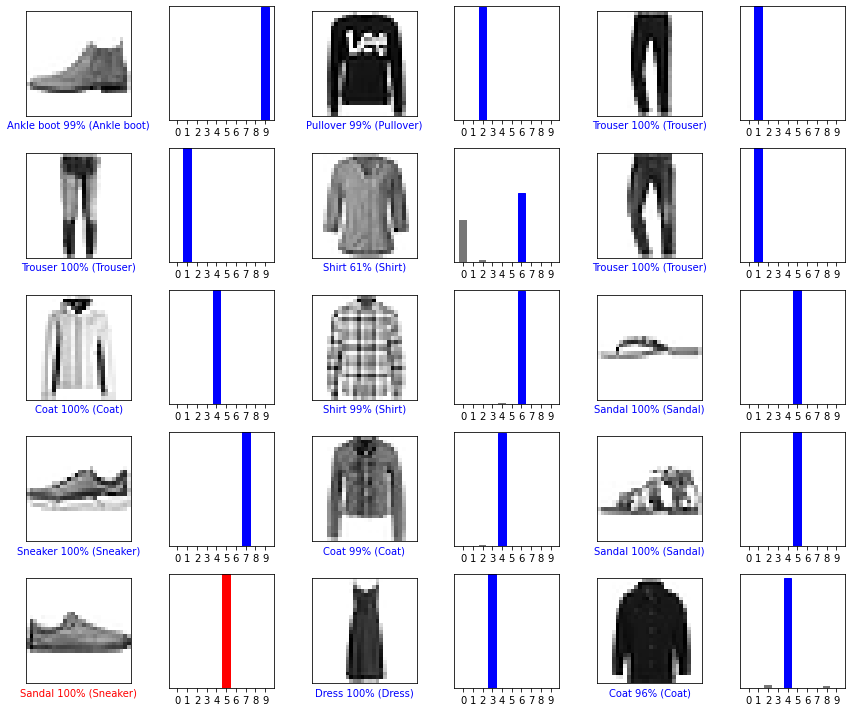

In [24]:
# 15개 예측결과 시각화
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### 훈련된 모델 사용하기

In [25]:
img = test_images[1]
print(img.shape)

(28, 28)


In [26]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


- tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있기에 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 함

In [27]:
# 이미지 예측 생성
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[4.4768670e-04 5.1984761e-10 9.9319285e-01 3.9085140e-07 3.9481772e-03
  3.4331164e-12 2.4064831e-03 1.3118669e-16 4.4878375e-06 2.2256537e-11]]


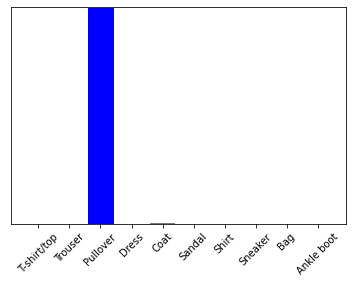

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
np.argmax(predictions_single[0])

2